## Gradient Descend

In [1]:
import numpy as np
import matplotlib.pyplot as plt

$$
y = f(x_1, x_2, \cdots, x_n)
$$

$$
\frac{\partial y}{\partial x_i} = 0
$$

In [53]:
def f_x(x):
    return x ** 2 + 3*x + 6

def f_grad(x):
    return 2*x + 3

# hyperparameter
lr = 0.01
tol = 0.0001
max_iter = 100

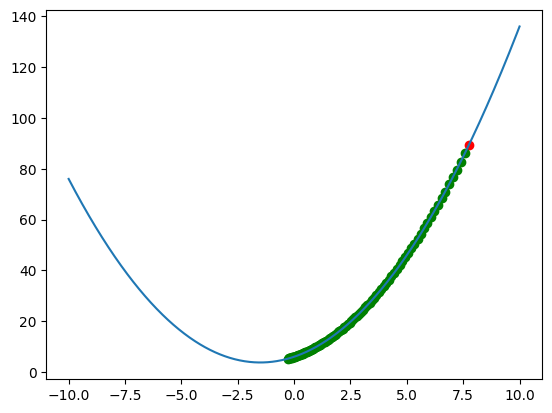

i = 99


In [54]:
x = np.linspace(-10, 10, 1000)
y = f_x(x)

x0 = np.random.random() * (x.max() - x.min()) + x.min()
y0 = f_x(x0)

plt.plot(x, y)
plt.scatter(x0, y0, color='red')

for i in range(max_iter):
    grad = f_grad(x0)
    if abs(grad) < tol:
        break
    x0 = x0 - lr * grad
    y0 = f_x(x0)
    plt.scatter(x0, y0, color='green')

plt.show()
print("i =", i)

In [38]:
grad

np.float64(5.0512176663630726e-09)

In [50]:
from sklearn.linear_model import LinearRegression

In [52]:
model = LinearRegression(fit_intercept=False)

In [ ]:
model.fit(X, y)

In [55]:
from sklearn.linear_model import SGDRegressor

model = SGDRegressor()

$$
\hat{y} = \beta_0 + \beta_1x_1 + \beta_2x_2 + \cdots + \beta_Nx_N
$$

$$
\text{Loss} = \sum_{i=1}^N (y_i - \hat{y}_i) ^ 2
$$

$$
\text{Loss} = \sum_{i=1}^N (y_i - (\beta_0 + \beta_1x_1 + \beta_2x_2 + \cdots + \beta_Nx_N)) ^ 2
$$

$$
\frac{\text{Loss}(\beta)}{\beta_0}
$$

$$
\frac{\text{Loss}(\beta)}{\beta_1}
$$

$$
\frac{\text{Loss}(\beta)}{\beta_N}
$$

In [ ]:
[1, 4, 5, 6, 7] - 0.1 * [0.7, 0.5, -1.3, 6.4, -1.6]

In [ ]:
X.shape -> (10, 3)
X.shape[1]

In [56]:
coef = np.random.randn(4)
coef

array([ 1.41932491, -1.03548266,  0.42667658,  0.71732558])

### Predict advertising

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import train_test_split

In [2]:
data = np.loadtxt('data/advertising.csv', delimiter=',', skiprows=1)

X = data[:, :3]
y = data[:, 3]

In [3]:
X.shape

(200, 3)

In [4]:
train_size = int(0.7 * X.shape[0])

ix = np.random.permutation(X.shape[0])
X = X[ix]
y = y[ix]

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
sclr = StandardScaler()
sclr.fit(X_train)

X_train = sclr.transform(X_train)
X_test = sclr.transform(X_test)

In [7]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [8]:
inp = np.array([[230.1,37.8,69.2]])
inp = sclr.transform(inp)

In [9]:
lin_reg.predict(inp)

array([21.27513821])

In [11]:
sclr.mean_

array([138.679375,  23.94375 ,  30.308125])

In [12]:
sclr.scale_

array([84.40288139, 15.07727051, 20.81144809])

In [13]:
lin_reg.coef_

array([ 4.75338342,  1.60461246, -0.09364872])

In [14]:
lin_reg.intercept_

np.float64(14.826875)

In [15]:
import joblib

In [16]:
joblib.dump(sclr, 'scaler.joblib')

['scaler.joblib']

In [17]:
joblib.dump(lin_reg, 'lin_reg.joblib')

['lin_reg.joblib']